In [92]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

In [93]:
df=pd.read_excel('BPR Only .xlsx','Sheet1')

In [94]:
#df.head()

In [95]:
df['Account'].count()

117472

In [96]:
#df.shape

In [97]:
df.dropna(inplace=True)

In [98]:
#df.shape

In [99]:
#df['Account'].apply(pd.value_counts)

In [100]:
df=df[df.Account == (115806 or 928860) ]

In [101]:
df.shape

(3654, 19)

In [102]:
#df.head()

In [103]:
df.drop(columns=['    BusA','CCAr','Zone','Bran'],inplace=True)

In [104]:
#df.head(5)

In [105]:
df.drop(columns=['Reference','Account','DocumentNo','Doc/Chq dt','Year','Clrng doc.'],inplace=True)

In [106]:
#df.shape

In [107]:
df.drop(columns='Customer Name',inplace=True)

In [16]:
#df.shape

In [17]:
#df.head()

In [108]:
df['Status']=df['Status'].astype('category')

In [109]:
df["Status"] = df["Status"].cat.codes

In [110]:
#df.head()

In [111]:
#df['Status'].value_counts()

In [112]:
df['PayT'] = df['PayT'].map(lambda x: int(x.lstrip('ZZ')))


In [113]:
#df

In [114]:
df['Pstng Date']=df['Pstng Date'].dt.strftime("%Y%m%d").astype(str)
df['Net Due Dt']=df['Net Due Dt'].dt.strftime("%Y%m%d").astype(str)
df['Clearing']=df['Clearing'].dt.strftime("%Y%m%d").astype(str)

In [115]:
df

,Status,Local Crcy Amt,Arr (Clearing - Net Due Date),PayT,Month,Pstng Date,Net Due Dt,Clearing
603,0,0.154560,-1,41,Sep,20180920,20180930,20180929
624,0,0.162293,-1,41,Sep,20180922,20181002,20181001
625,0,0.174352,-1,40,Sep,20180922,20180930,20180929
626,0,0.161904,-1,41,Sep,20180922,20181002,20181001
635,0,0.171334,-1,40,Sep,20180922,20180930,20180929
636,0,0.133184,-2,41,Sep,20180923,20181003,20181001
638,0,0.148742,-2,40,Sep,20180923,20181001,20180929
639,0,0.153805,-2,40,Sep,20180923,20181001,20180929
647,0,0.185169,-1,40,Sep,20180924,20181002,20181001
659,0,0.147591,-2,40,Sep,20180925,20181003,20181001


In [26]:
df = df.reset_index()
df.drop(columns='index',inplace=True)
df.to_excel('Reduced.xlsx')

In [276]:
df['Arr (Clearing - Net Due Date)'].value_counts()

 0     2302
-1      660
-2      333
 2      112
 1      100
 3       90
-3       31
 4       13
 5       10
-4        2
 10       1
Name: Arr (Clearing - Net Due Date), dtype: int64

In [28]:
sums=0
arr=[]
for i in range(len(df)):
    if(df['Status'][i]==1):
        sums=df['  Local Crcy Amt'][i]
        arr.append(sums)
    else:
        arr.append(0)
    
df['Delay Amount']=arr

In [29]:
df['Delay Amount']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000000
7       0.000000
8       0.000000
9       0.000000
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      0.000000
15      0.000000
16      0.000000
17      0.000000
18      0.000000
19      0.000000
20      0.000000
21      0.000000
22      0.000000
23      0.000000
24      0.000000
25      0.000000
26      0.000000
27      0.158651
28      0.143911
29      0.136224
          ...   
3624    0.149750
3625    0.150504
3626    0.150667
3627    0.151493
3628    0.152742
3629    0.154740
3630    0.156213
3631    0.156780
3632    0.157949
3633    0.241375
3634    0.165301
3635    0.171330
3636    0.141827
3637    0.142035
3638    0.190018
3639    0.190351
3640    0.144564
3641    0.198283
3642    0.151423
3643    0.151866
3644    0.164303
3645    0.132634
3646    0.168795
3647    0.169221
3648    0.140275
3649    0.176805
3650    0.144564
3651    0.1533

In [78]:

############################   START FROM HERE   ###############################################

#df=pd.read_excel('Reduced.xlsx')

In [283]:
x='Pstng Date'
dict1={ '10':np.zeros([8]),'11':np.zeros([8]),'12':np.zeros([8])}
for j in range(len(dict1)):
    sums=0
    count=0
    sums_day=0
    sums_day_count=0
    sums_day_start=0
    sums_day_count_start=0
    for i in range(len(df)):
        if(df['Arr (Clearing - Net Due Date)'][i]>0):
            #if(df['Pstng Date'][i][:4]=='2018'):
                if(df[x][i][4:6]==list(dict1.keys())[j]):
                        count=count+1
                        dict1[df[x][i][4:6]][0]+=df['Delay Amount'][i]
                        dict1[df[x][i][4:6]][1]+=1
                        
                        if(int(df[x][i][6:])<=10):
                            dict1[df[x][i][4:6]][2]+=df['Delay Amount'][i]
                            dict1[df[x][i][4:6]][3]+=1
                            
                        if(int(df[x][i][6:])>10 and int(df[x][i][6:])<20):
                            dict1[df[x][i][4:6]][4]+=df['Delay Amount'][i]
                            dict1[df[x][i][4:6]][5]+=1
                        
                        if(int(df[x][i][6:])>=20):
                            dict1[df[x][i][4:6]][6]+=df['Delay Amount'][i]
                            dict1[df[x][i][4:6]][7]+=1



    
dict1

{'10': array([0.29894517, 2.        , 0.        , 0.        , 0.29894517,
        2.        , 0.        , 0.        ]),
 '11': array([ 23.69289603, 163.        ,   0.        ,   0.        ,
         11.08479925,  74.        ,  12.60809678,  89.        ]),
 '12': array([ 21.33161669, 159.        ,   8.96300402,  65.        ,
          5.03411287,  39.        ,   7.3344998 ,  55.        ])}

In [284]:
for key, value in dict1.items():
    for i in range(len(value)):
        if(i%2==0):
            if(value[i+1]!=0):
                value[i]=value[i]/value[i+1]
            
dict1
       

{'10': array([0.14947258, 2.        , 0.        , 0.        , 0.14947258,
        2.        , 0.        , 0.        ]),
 '11': array([1.45355190e-01, 1.63000000e+02, 0.00000000e+00, 0.00000000e+00,
        1.49794584e-01, 7.40000000e+01, 1.41664009e-01, 8.90000000e+01]),
 '12': array([1.34161111e-01, 1.59000000e+02, 1.37892369e-01, 6.50000000e+01,
        1.29079817e-01, 3.90000000e+01, 1.33354542e-01, 5.50000000e+01])}

In [285]:
for key,values in dict1.items():
    print(values)

[0.14947258 2.         0.         0.         0.14947258 2.
 0.         0.        ]
[1.45355190e-01 1.63000000e+02 0.00000000e+00 0.00000000e+00
 1.49794584e-01 7.40000000e+01 1.41664009e-01 8.90000000e+01]
[1.34161111e-01 1.59000000e+02 1.37892369e-01 6.50000000e+01
 1.29079817e-01 3.90000000e+01 1.33354542e-01 5.50000000e+01]


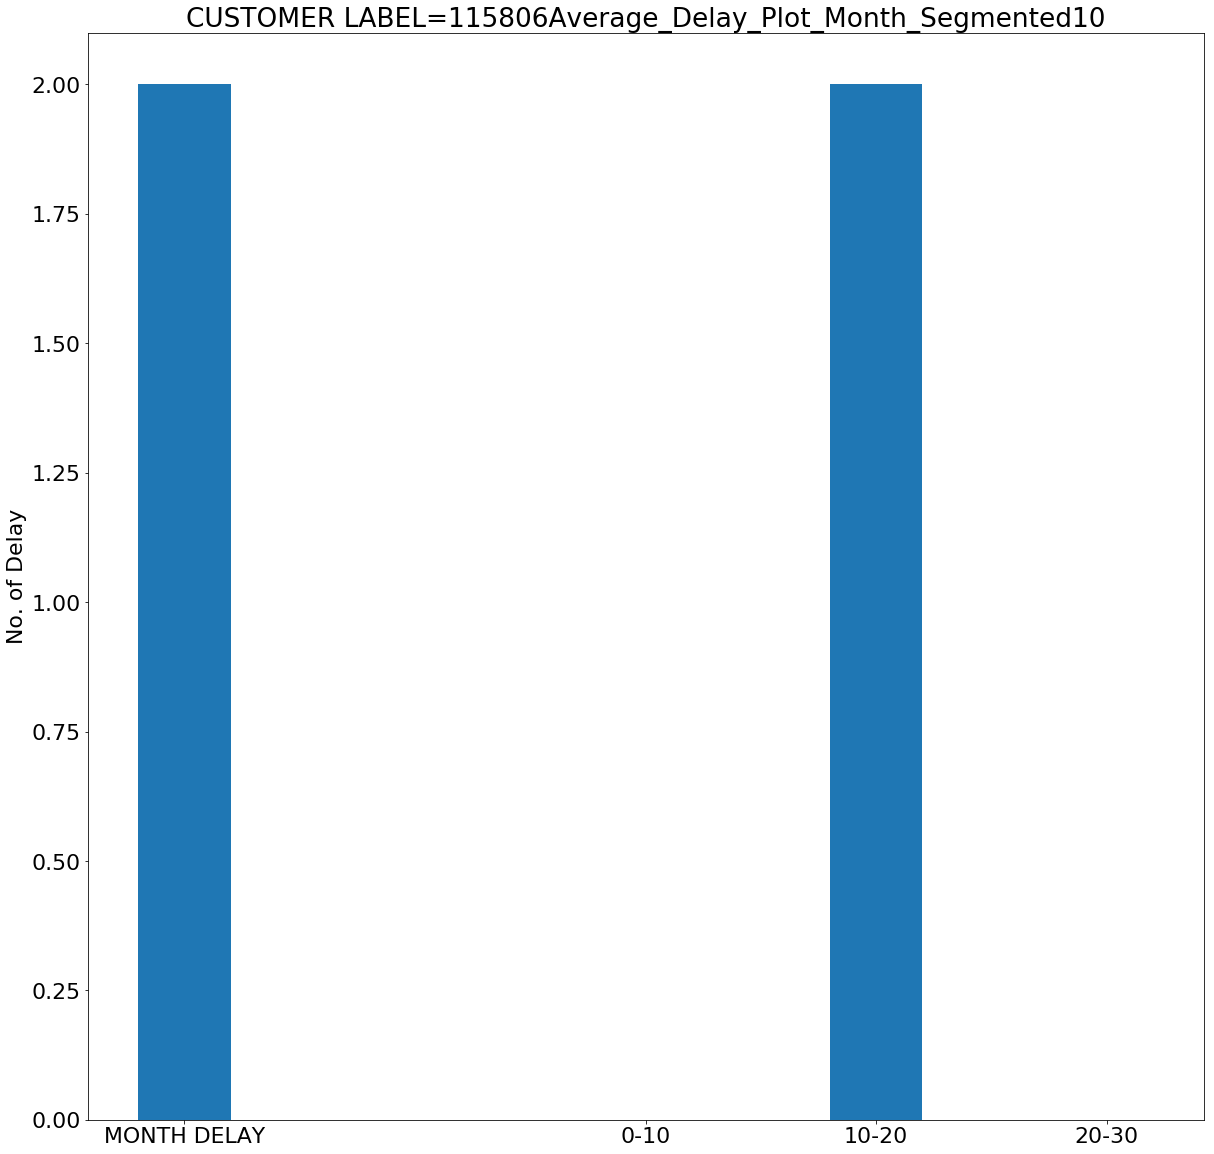

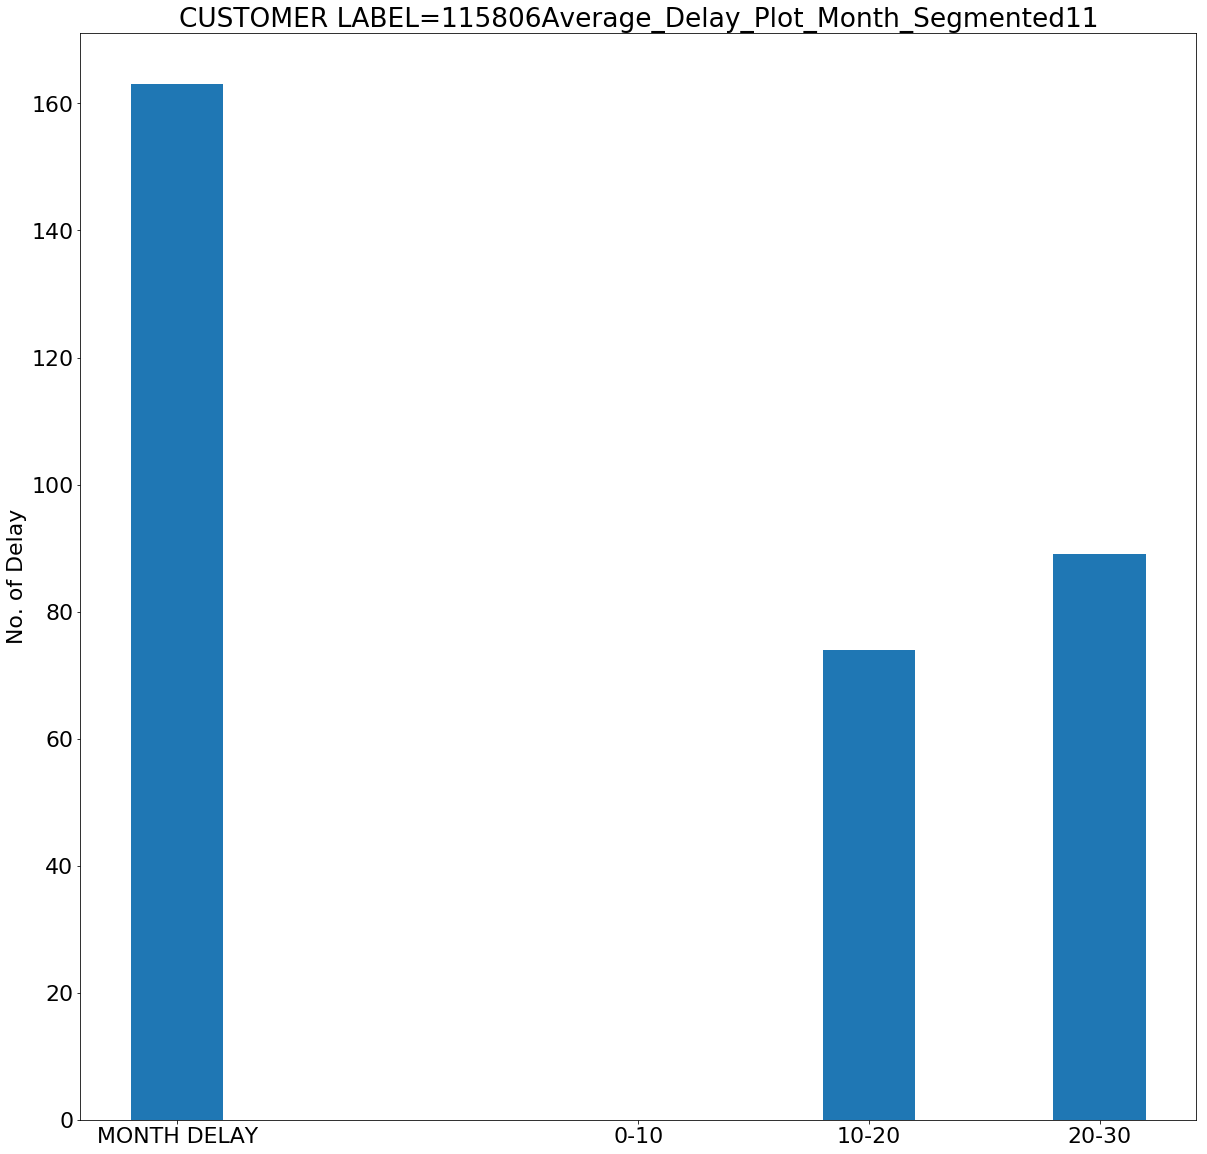

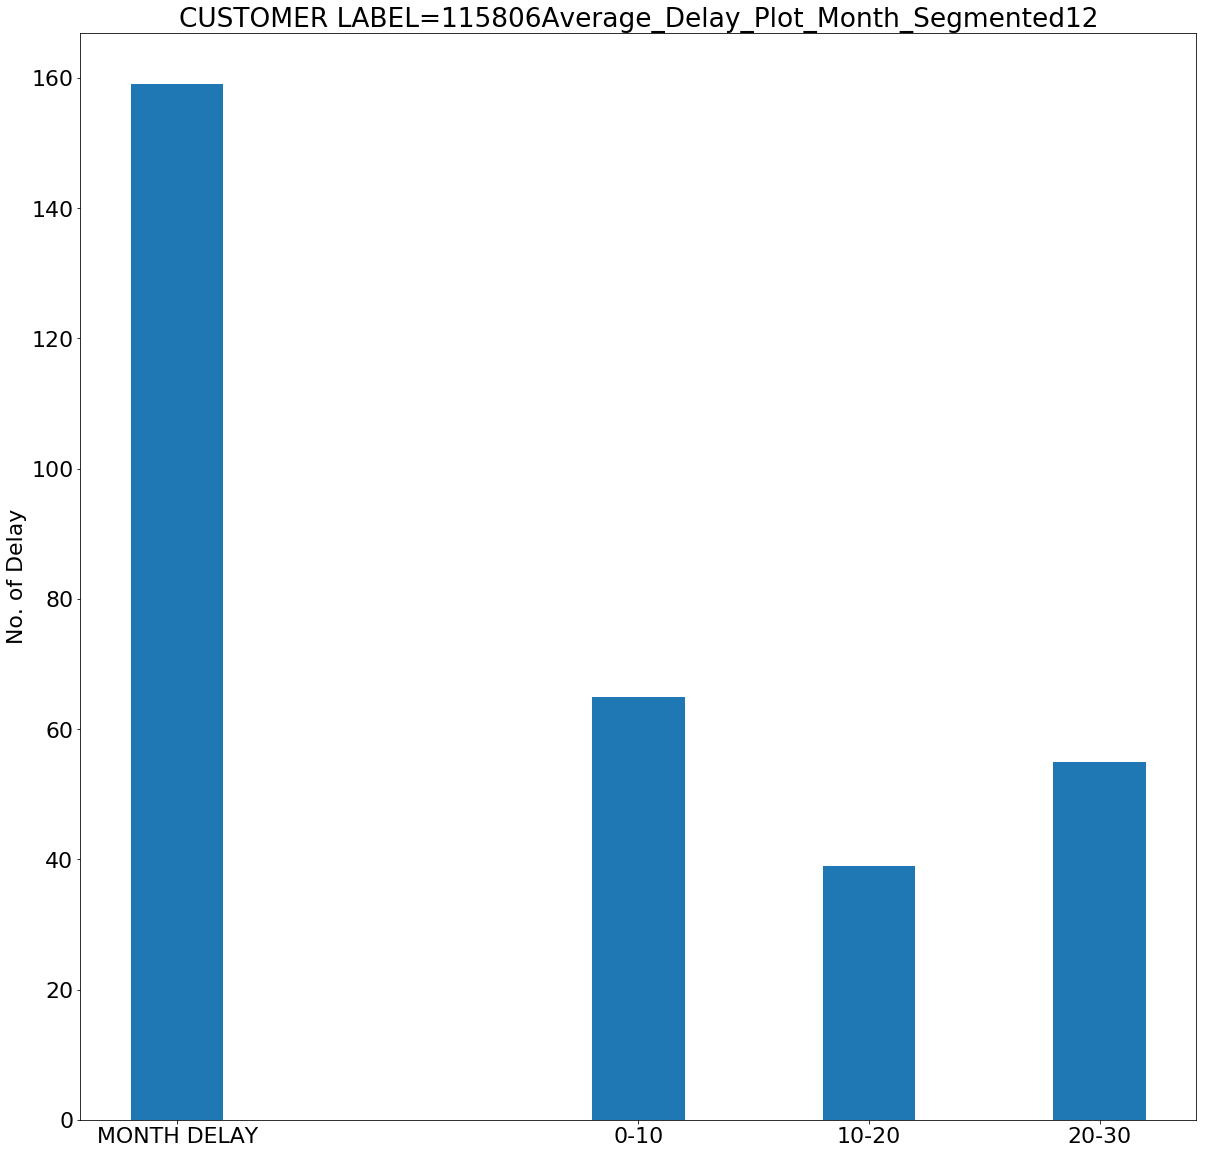

In [287]:
for key,values in dict1.items():
    
    fig = plt.figure(figsize=(20, 20))
    plt.rcParams.update({'font.size': 22})
    plt.bar([1, 5, 7,9],[values[1],values[3],values[5],values[7]], tick_label=['MONTH DELAY','0-10','10-20','20-30'])
    #plt.bar([1, 5, 7,9],[values[0],values[2],values[4],values[6]], tick_label=['Av MONTH DELAY','0-10','10-20','20-30'])
    ylabel('No. of Delay')
    #ylabel('Average Amount of Delay')
    plt.title('CUSTOMER LABEL=115806'+'Average_Delay_Plot_Month_Segmented{}'.format(key))
    #plt.savefig('Average_Delay_Plot_Month_segmented{}'.format(key)+'.png')
    plt.show()


In [ ]:
#Training Model

In [79]:
df.drop(columns='Clearing',inplace=True)
df.drop(columns='Arr (Clearing - Net Due Date)',inplace=True)

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
y=np.array(df['Status'])

X=df
df.drop(columns='Month',inplace=True)


In [119]:
df = df.reset_index()
df.drop(columns='index',inplace=True)

In [120]:
f1=df.drop(columns=['Status','',inplace=True)

In [121]:
df

,Local Crcy Amt,Arr (Clearing - Net Due Date),PayT,Month,Pstng Date,Net Due Dt,Clearing
0,0.154560,-1,41,Sep,20180920,20180930,20180929
1,0.162293,-1,41,Sep,20180922,20181002,20181001
2,0.174352,-1,40,Sep,20180922,20180930,20180929
3,0.161904,-1,41,Sep,20180922,20181002,20181001
4,0.171334,-1,40,Sep,20180922,20180930,20180929
5,0.133184,-2,41,Sep,20180923,20181003,20181001
6,0.148742,-2,40,Sep,20180923,20181001,20180929
7,0.153805,-2,40,Sep,20180923,20181001,20180929
8,0.185169,-1,40,Sep,20180924,20181002,20181001
9,0.147591,-2,40,Sep,20180925,20181003,20181001


In [122]:
X=df
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [123]:
model= RandomForestClassifier(n_estimators=100,n_jobs=3, random_state=0)

In [124]:
y1=model.fit(xtrain, ytrain)

ValueError: could not convert string to float: 'August'

In [89]:
y2=model.predict(xtest)

In [90]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(ytest, y2))

Accuracy: 0.9958960328317373


In [91]:
pd.Series(model.feature_importances_,index=df.columns).sort_values(ascending=False)

Unnamed: 0          0.591229
Net Due Dt          0.207835
Pstng Date          0.175665
PayT                0.013224
  Local Crcy Amt    0.012048
dtype: float64

In [116]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(xtrain, ytrain)
y4=logisticRegr.predict(xtest)
print("Accuracy:",metrics.accuracy_score(ytest, y4))

C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.9015047879616963


In [117]:
cdf = pd.DataFrame(logisticRegr.coef_, X.columns, columns=['Coefficients'])
print(cdf)

ValueError: Shape of passed values is (1, 5), indices imply (5, 1)

In [77]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=3)  
kmeans.fit(xtrain)
y6=kmeans.labels_
print("Accuracy:",metrics.accuracy_score(ytrain, y6))

Accuracy: 0.4714334587752309
